In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Import the dataset and explore basic info 

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handle missing values using mean/median/imputation.

In [14]:
# Fill missing Age with median
data['Age'] = data['Age'].fillna(data['Age'].median())


In [15]:
# Fill missing Embarked with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [16]:
data.drop(columns=['Cabin'], inplace=True)

### Convert categorical features into numerical using encoding.

In [17]:
# Convert 'Sex' and 'Embarked' into numeric values using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

### Standardize the numerical features.

In [18]:
# Select numerical columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

print("Scaled Numerical Features:")
print(data_encoded[num_cols].head())

Scaled Numerical Features:
        Age      Fare     SibSp     Parch
0 -0.565736 -0.502445  0.432793 -0.473674
1  0.663861  0.786845  0.432793 -0.473674
2 -0.258337 -0.488854 -0.474545 -0.473674
3  0.433312  0.420730  0.432793 -0.473674
4  0.433312 -0.486337 -0.474545 -0.473674


### Visualize outliers using boxplots and remove them.

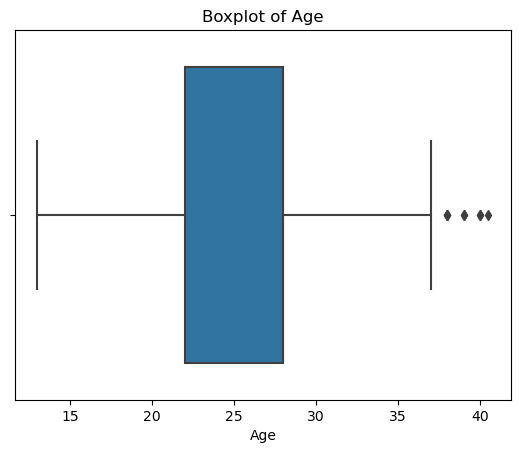

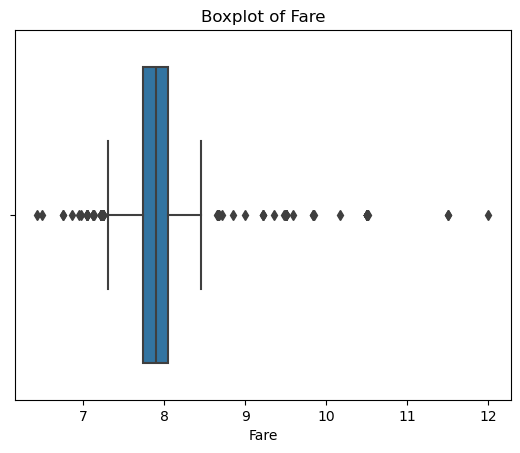

In [29]:
# Boxplot for Age
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Fare
sns.boxplot(x=data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [31]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [33]:
df = remove_outliers_iqr(data, 'Age')
df = remove_outliers_iqr(data, 'Fare')

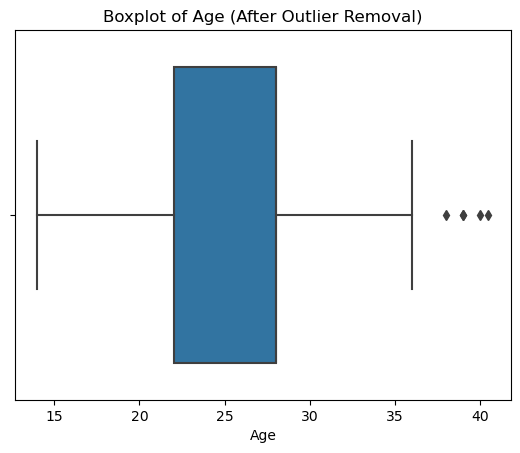

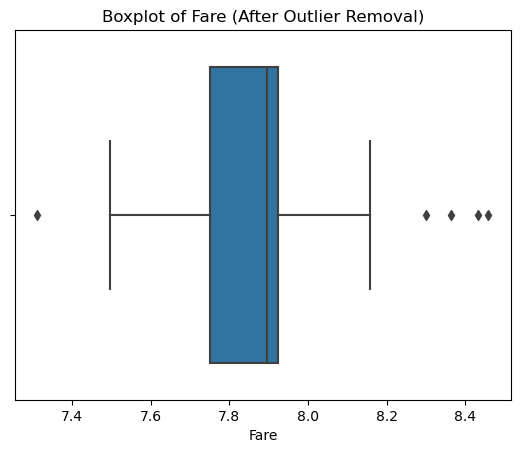

In [35]:
# Boxplot for Age after outlier removal
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age (After Outlier Removal)')
plt.show()

# Boxplot for Fare after outlier removal
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare (After Outlier Removal)')
plt.show()